  ( n|  B| overlap )
>> 70|100| 25
   88| 80| 20
  110| 80| 24
  126| 72| 22
  146| 96| 36
  160| 80| 29
  176| 80| 30
  196| 72| 27
  220| 80| 32
  250|100| 43
  252| 72| 29
  292| 96| 42
  294| 72| 30
  350|100| 45
  352| 80| 35
  354| 60| 25
  438| 96| 44
  440| 80| 36
  442| 64| 28
  444| 48| 20
  584| 96| 45
  586| 84| 39
  588| 72| 33
  590| 60| 27
  592| 48| 21
  876| 96| 46
  878| 88| 42
  880| 80| 38
  882| 72| 34
  884| 64| 30
  886| 56| 26
  888| 48| 22
  1750|100| 49
  1752| 96| 47
  1754| 92| 45
  1756| 88| 43
  1758| 84| 41
  1760| 80| 39
  1762| 76| 37
  1764| 72| 35
  1766| 68| 33
  1768| 64| 31
  1770| 60| 29
  1772| 56| 27
  1774| 52| 25
  1776| 48| 23
  1778| 44| 21


[(0, 75), (75, 125), (125, 175), (175, 225), (225, 275), (275, 325), (325, 375), (375, 425), (425, 475), (475, 525), (525, 575), (575, 625), (625, 675), (675, 725), (725, 775), (775, 825), (825, 875), (875, 925), (925, 975), (975, 1025), (1025, 1075), (1075, 1125), (1125, 1175), (1175, 1225), (1225, 1275), (1275, 1325), (1325, 1375), (1375, 1425), (1425, 1475), (1475, 1525), (1525, 1575), (1575, 1625), (1625, 1675), (1675, 1725), (1725, 1775), (1775, 1825), (1825, 1875), (1875, 1925), (1925, 1975), (1975, 2025), (2025, 2075), (2075, 2125), (2125, 2175), (2175, 2225), (2225, 2275), (2275, 2325), (2325, 2375), (2375, 2425), (2425, 2475), (2475, 2525), (2525, 2575), (2575, 2625), (2625, 2675), (2675, 2725), (2725, 2775), (2775, 2825), (2825, 2875), (2875, 2925), (2925, 2975), (2975, 3025), (3025, 3075), (3075, 3125), (3125, 3175), (3175, 3225), (3225, 3275), (3275, 3325), (3325, 3375), (3375, 3425), (3425, 3475), (3475, 3525), (3525, 3600)]


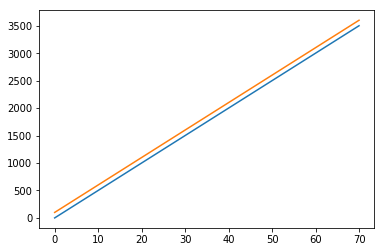

In [10]:
import numpy as np
import logging

def define_equal_subsets(N,max_block_size, min_overlap,verbose=False):
    """
    Break an abscissa into equal overlaping regions using modular arithmetic.
    Args:
    N : int length of abscisa
    max_block_size : int maximal size of partitions
    min_overlap : int minimum overlap in units of elements
    verbose: bool print the options
    """
    
    def xgcd(b, a):
        x0, x1, y0, y1 = 1, 0, 0, 1
        while a != 0:
            q, b, a = b // a, a, b % a
            x0, x1 = x1, x0 - q * x1
            y0, y1 = y1, y0 - q * y1
        return  b, x0, y0

    def mulinv(b, n):
        g, x, _ = xgcd(b, n)
        if g == 1:
            return x % n

    res = []
    for n in range(1,N):
        a = -2*n
        b = n+1
        ainv = mulinv(a,b)
        if ainv is None:
            continue
        O = (ainv * N) % b
        B = (N - a*O)//b
        if B <= max_block_size and O >= min_overlap and B - 2*O > 0:
            res.append((n,B,O))
        
    if len(res) == 0:
        raise ValueError("Incompatible max blocksize and min overlap. Try raising or lowering respectively.")
    possible = np.array(res)
    
    ##
    # selection
    min_n = np.argmin(possible[:,0])
    res = possible[min_n,:]
#     max_B = np.argmax(res[:,1])
#     res = res[max_B,:]
#     print(res)
#     max_B = np.atleast_1d(np.argmax(possible[:,1]))
#     res = possible[max_B,:]
#     min_overlap = np.argmin(res[:,2])
#     res = tuple(res[min_overlap,:])
    if verbose:
        verb = "\n".join(["  {:3d}|{:3d}|{:3d}".format(*r) if not np.all(r == res) else ">>{:3d}|{:3d}|{:3d}".format(*r) for r in possible])
        logging.warning("Available configurations:\n  ( n|  B| overlap )\n{}".format(verb))
    
    blocks, val_blocks = [],[]
    start=0
    i = 0
    n,B,O = res
    while i <= n:
        blocks.append((i*B - i*2*O, (i+1)*B - i*2*O))
        if i == 0:
            val_blocks.append((blocks[-1][0], blocks[-1][1]-O))
        elif i == n:
            val_blocks.append((blocks[-1][0] + O, blocks[-1][1]))
        else:
            val_blocks.append((blocks[-1][0] + O, blocks[-1][1] - O))
        i += 1
    return blocks, val_blocks

N = 3600
blocks, val_blocks = define_equal_subsets(N,100,20,True)
print(val_blocks)
import pylab as plt
plt.plot(blocks)
plt.show()


In [53]:

def block_and_overlap(N,max_block_size, min_overlap,verbose=False):
    res = []
    for n in range(1,N+1):
        for B in range(1,max_block_size+1):
            for o in range(min_overlap,B//2):
                if N == (n+1)*B - n*2*o:
                    res.append((n,B,o))
    if len(res) == 0:
        raise ValueError("Incompatible max blocksize and min overlap. Try raising or lowering respectively.")
    possible = np.array(res)
    
    max_B = np.atleast_1d(np.argmax(possible[:,1]))
    res = possible[max_B,:]
    min_overlap = np.argmin(res[:,2])
    res = tuple(res[min_overlap,:])
    if verbose:
        verb = "\n".join(["  {:3d}|{:3d}|{:3d}".format(*r) if tuple(r) != res else ">>{:3d}|{:3d}|{:3d}".format(*r) for r in possible])
        logging.warning("Available configurations:\n  ( n|  B| overlap )\n{}".format(verb))
    return res

N = 50
res = block_and_overlap(N,20,5,True)



    


    
    

  ( n|  B| overlap )
>>  3| 20|  5
    4| 18|  5
    5| 20|  7
    7| 15|  5
    8| 18|  7
    9| 14|  5
   11| 17|  7
   15| 20|  9
   16| 18|  8
   17| 16|  7
   18| 14|  6
   19| 12|  5


In [7]:
16| 18|  8
12| 26| 12

(10, 500, 95)